# Assignment 3 - Pie Chart Analysis

**Course:** Programming for Data Analytics  
**Lecture:** Module 3 - Data Visualization  
**Author:** Clyde Watts
**Date:** 2025-10-11
**Assignment:** Email Domain Distribution Analysis

---

## Assignment Instructions
Create a notebook called assignment03-pie.ipynb

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.

Marks will be given for:

Just creating the pie chart
Making it look nice
As always your code should be well laid out.

If you are having difficulties, know I will be doing more on Pie charts later in this module.

## Import Modules

In [32]:
import pandas as pd
# Librarys basic plotting capabilities
import matplotlib.pyplot as plt


## Load data 

Load the data into a panda dataframe from google drive and does some data exploration

In [13]:
# Google drive link to the data
people_earl = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"
# Load data from google drive link into a panda dataframe
people_earl_df = pd.read_csv(people_earl)
# Print out the information about the dataframe
print(f"Url : {people_earl}")
print(f"Dataframe shape : {people_earl_df.shape}")
print(f"Info            : {str(people_earl_df.info())}")
print(f"Columns         : {people_earl_df.columns}")
people_earl_df.head()


Url : https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download
Dataframe shape : (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
Info            : None
Columns         : Index(['Index', 'User Id', 'First Name', 'Last Name', 'Sex', 'Email', 'Phone',
       'Date of birth', 'Job Title'],
      dtype='object')


,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


The column we are interested in the Email column and in specifically the domain in the email address  
The email address consist address consits of <user name>@<domain>.
An extra column will be added to the data from called Domain , which consists of all the domains of the email address.


In [15]:
# Extract domain from email using string operations as per Andrew Beatty
people_earl_df['Domain'] = people_earl_df['Email'].str.split('@').str[1]
# There are other ways of doing this using regex
# people_earl_df['Domain'] = people_earl_df['Email'].str.extract(r'@(.+)')
# people_earl_df['Domain'] = people_earl_df['Email'].str.replace(r'.+@', '', regex=True)
# this is the coolest way - apply a lambda function to the email column
# people_earl_df['Domain'] = people_earl_df['Email'].apply(lambda x: x.split('@')[1])
people_earl_df.head()


,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Domain
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer,example.org
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer,example.net
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy,example.org
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist,example.com
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer,example.net


Do a group by of the email data and order by count

In [19]:
people_earl_df['Domain'].value_counts().sort_values(ascending=False).head(10)

Domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

# Plot PIE chart


[Matplot Lib Pie charts documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

Note:  

Added BAR plot because it is visually shows the difference. 


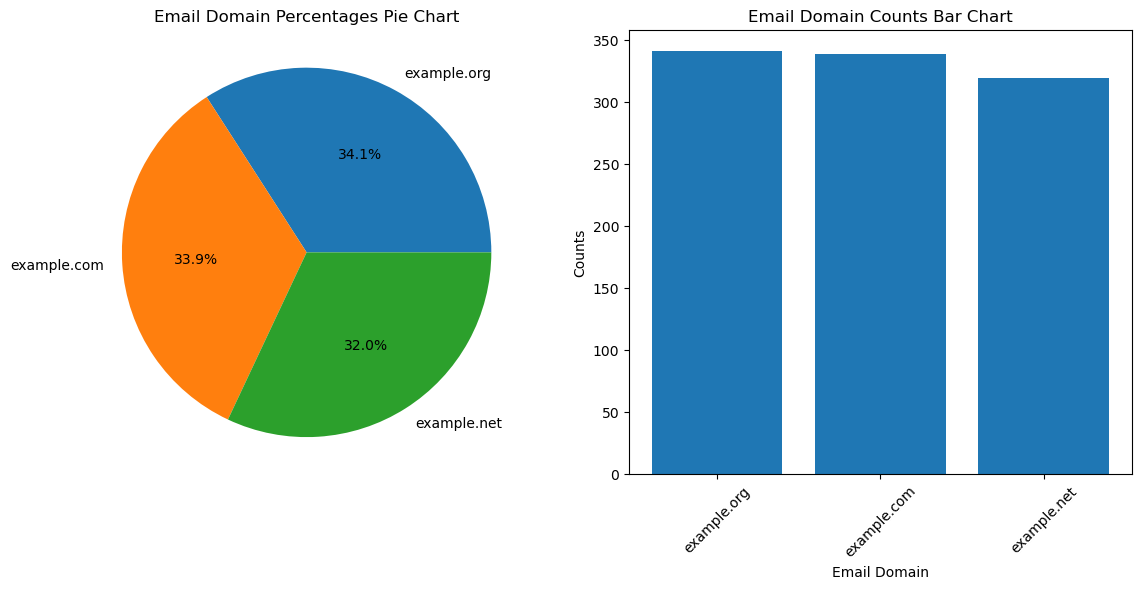

In [44]:
# 1st we need to get counts of the domains
domain_counts = people_earl_df['Domain'].value_counts()
# create 2 plots one for pie chart and one for bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# domain counts - column names
ax[0].pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Email Domain Percentages Pie Chart')

# Bar chart
ax[1].bar(domain_counts.index, domain_counts.values)
ax[1].set_title('Email Domain Counts Bar Chart')
ax[1].set_xlabel('Email Domain')
ax[1].set_ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The End